In [1]:
using StatsBase
using Tables

# fibonnaci sequence
function fib(n)
    if n < 2
        return n
    else
        return fib(n-1) + fib(n-2)
    end
end

# generate a random number from a fibonnaci sequence




fib (generic function with 1 method)

In [2]:
using Plots

# Section 1 Overview

Section 1 introduces you to Discrete Probability. Section 1 is divided into three parts:

Introduction to Discrete Probability
Combinations and Permutations
Addition Rule and Monty Hall
After completing Section 1, you will be able to:

apply basic probability theory to categorical data.
perform a Monte Carlo simulation to approximate the results of repeating an experiment over and over, including simulating the outcomes in the Monty Hall problem.
distinguish between: sampling with and without replacement, events that are and are not independent, and combinations and permutations.
apply the multiplication and addition rules, as appropriate, to calculate the probably of multiple events occurring.
use sapply() instead of a for loop to perform element-wise operations on a function.
There are 3 assignments that use the DataCamp platform for you to practice your coding skills. There are also some quick probability calculations for you to perform directly on the edX platform as well, and there is a longer set of problems at the end of section 1.

This section corresponds to the following section of the course textbook.

We encourage you to use R to interactively test out your answers and further your learning.



# Discrete Probability


RAFAEL IRIZARRY: We start by covering some basic principles related to categorical data.

This subset of probability is referred to as discrete probability.

It will help us understand the probability theory we will later introduce for numeric and continuous data, which is more common in data science applications.
Discrete probability is more useful in card games and we use these as examples.
The word probability is used in everyday language.
For example, Google's auto complete of, what are the chances of,gives us getting pregnant, having twins, and rain tomorrow.
Answering questions about probability is often hard, if not impossible.
Here, we discuss a mathematical definition of probability that does permit us to give precise answers to certain questions.
For example, if I have two red beads and three blue beads inside an urn and I pick one at random, what is the probability of picking a red one?
Our intuition tells us that the answer is 2/5, or 40%.
A precise definition can be given by noting that there are five possible outcomes of which two satisfy
the condition necessary for the event "pick a red bead."
Because each of the five outcomes has the same chance of occurring, we conclude that the probability is 0.4 for red and 0.6 for blue.
A more tangible way to think about the probability of an event is as a proportion of times the event occurs when we repeat the experiment over and over independently and under the same
conditions.
Before we continue, let's introduce some notation. We use the notation probability of A to denote the probability of an event A happening.
We use the very general term event to refer to things that can happen when something happens by chance.
For example, in our previous example, the event was picking a red bead.
In a political poll, in which we call 100 likely voters at random, an example of an event is calling 48 Democrats and 52 Republicans.
In data science applications, we will often deal with continuous variables.
In these cases, events will often be things like, is this person taller than 6 feet?
In this case, we write events in a more mathematical form.
For example, x greater than 6.
We'll see more of these examples later.
Here, we focus on categorical data and discrete probability.


The probability of an event is the proportion of times the event occurs when we repeat the experiment independently under the same conditions.

$$P(A) = \text{probability of event A}$$

An event is defined as an outcome that can occur when when something happens by chance.
We can determine probabilities related to discrete variables (picking a red bead, choosing 48 Democrats and 52 Republicans from 100 likely voters) and continuous variables (height over 6 feet).



Sure, I can help you with that. Here is the text with line breaks:

RAFAEL IRIZARRY: Computers provide a way to actually perform
the simple random experiments, such as the one we did before.
Pick a bead at random from a bag or an urn with 3 blue beads and 2 red ones.
Random number generators permit us to mimic the process of picking at random.
An example in R is the sample function.
We demonstrate its use showing you some code.
First, use the rep function to generate the urn.
We create an urn with 2 red and 3 blues.
You can see when we type beads we see this.
Now, we can use a sample function to pick one at random.
If we type sample beads comma 1, in this case, we get a blue.
This line of code produces one random outcome.
Now, we want to repeat this experiment over and over.
However, it is, of course, impossible to repeat forever.
Instead, we repeat the experiment a large enough number of times
to make the results practically equivalent to doing it
over and over forever.
This is an example of a Monte Carlo simulation.
Note that much of what mathematical and theoretical statisticians study--
something we do not cover in this course--
relates to providing rigorous definitions of practically equivalent,
as well as studying how close a large number of experiment
gets us to what happens in the limit, the limit meaning if we did it forever.
Later in this module, we provide a practical approach
to deciding what is large enough.
To perform our first Monte Carlo simulation,
we use the replicate function.
This permits us to repeat the same task any number of times we want.
Here, we repeat the random event 10,000 times.
We set B to be 10,000, then we use the replicate function
to sample from the beads 10,000 times.
We can now see if, in fact, our definition
is in agreement with this Monte Carlo simulation approximation.
We can use table, for example, to see the distribution.
And then we can use prop.table to give us the proportions.
And we see that, in fact, the Monte Carlo simulation
gives a very good approximation with 0.5962 for blue and 0.4038 for red.

Is there anything else I can help you with?


Monte Carlo simulations model the probability of different outcomes by repeating a random process a large enough number of times that the results are similar to what would be observed if the process were repeated forever.

The sample() function draws random outcomes from a set of options.

The replicate() function repeats lines of code a set number of times. It is used with sample() and similar functions to run Monte Carlo simulations.

In [3]:
# create an urn with 2 red, 3 blue balls
beads = ["red", "red", "blue", "blue", "blue"]


5-element Vector{String}:
 "red"
 "red"
 "blue"
 "blue"
 "blue"

In [4]:
# sample 1 bead from urn at random
sample(beads, 1, replace = true)


1-element Vector{String}:
 "blue"

This line of code produces one random outcome. We want to repeat this experiment an infinite number of times, but it is impossible to repeat forever. Instead, we repeat the experiment a large enough number of times to make the results practically equivalent to repeating forever. This is an example of a Monte Carlo simulation.

Much of what mathematical and theoretical statisticians study, which we do not cover in this book, relates to providing rigorous definitions of “practically equivalent” as well as studying how close a large number of experiments gets us to what happens in the limit. Later in this section, we provide a practical approach to deciding what is “large enough”.

To perform our first Monte Carlo simulation, we use the replicate function, which permits us to repeat the same task any number of times. Here, we repeat the random event  $$B =   10,000 \text{ times}$$

In [5]:
# create monte carlo simulation to sample 1 bead 10000 times
# the bead will be sampled with replacement
# the result will be a vector of 10000 beads

# create empty vector to store results
results = []

[push!(results, sample(beads, 1, replace = true)) for i in 1:10000];

In [6]:
countmap(results) # count the number of times each color was sampled

Dict{Any, Int64} with 2 entries:
  ["blue"] => 5956
  ["red"]  => 4044

In [7]:
proportionmap(results) # calculate the proportion of each color sampled

Dict{Any, Float64} with 2 entries:
  ["blue"] => 0.5956
  ["red"]  => 0.4044

# An important application of the mean() function
In R, applying the mean() function to a logical vector returns the proportion of elements that are TRUE. It is very common to use the mean() function in this way to calculate probabilities and we will do so throughout the course.

Suppose you have the vector beads from a previous video:

beads <- rep(c("red", "blue"), times = c(2,3))
beads
[1] "red" "red" "blue" "blue" "blue"
To find the probability of drawing a blue bead at random, you can run:

mean(beads == "blue")
[1] 0.6
This code is broken down into steps inside R. First, R evaluates the logical statement beads == "blue", which generates the vector:

FALSE FALSE TRUE TRUE TRUE
When the mean function is applied, R coerces the logical values to numeric values, changing TRUE to 1 and FALSE to 0:

0 0 1 1 1
The mean of the zeros and ones thus gives the proportion of TRUE values. As we have learned and will continue to see, probabilities are directly related to the proportion of events that satisfy a requirement.

In [9]:
beads = ["red", "red", "blue", "blue", "blue"]


5-element Vector{String}:
 "red"
 "red"
 "blue"
 "blue"
 "blue"

In [11]:
mean(beads .== "blue")

0.6

In [12]:
beads .== "blue"

5-element BitVector:
 0
 0
 1
 1
 1

Key points
The probability distribution for a variable describes the probability of observing each possible outcome.
For discrete categorical variables, the probability distribution is defined by the proportions for each group.

# Independance

Key points
Conditional probabilities compute the probability that an event occurs given information about dependent events. For example, the probability of drawing a second king given that the first draw is a king is:

$$Pr(\text{Card 2 is a King} \text{ | } \text{Card 1 is a King}) = \frac{3}{51}$$

- if two events A and B are independance then:
$$Pr(A \text{ | } B) = Pr(A) $$

To determine the probability of multiple events occurring, we use the multiplication rule.

# Multiplication Rule

All right now, if we want to know the probability of two events, say A and B,
occurring, we can use the multiplication rule.
So the probability of A and B is equal to the probability of A multiplied
by the probability of B, given that A already happened.

$$Pr(A \text{ and  } B) = Pr(A)Pr(B \text{ | } A) $$

So the probability of A and B is equal to the probability of A multiplied
by the probability of B, given that A already happened.

When we have independent events, the multiplication rule becomes simpler.
We simply multiply of  probabilities.
But we have to be very careful when we use this rule.
the multiplicative rule in practice.
We're assuming independence.

The multiplication rule also applies to more than two events. We can use induction to expand for more events:



$$Pr(A \text{ and  } B \text{ and } C) = Pr(A)Pr(B \text{ | } A)Pr(C \text{ | A and B }) $$

## The multiplication rule also gives us a general formula for computing conditional probabilities:

$$Pr(B \text{ | } A) = \frac{Pr(\text{A and B})}{Pr(A)} $$

## Addition Rule

The addition rule tells us that:

$$Pr(A \ or \ B) = Pr(A) + Pr(B) - Pr(A \ and \ B)$$

This rule is intuitive: think of a Venn diagram. If we simply add the probabilities, we count the intersection twice so we need to substract one instance.

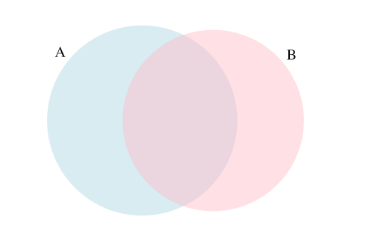

# Combinations and Permutations

In [13]:
# create a deck   of cards

suits = ["♠", "♥", "♦", "♣"] 
ranks = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]  #  13 cards

# create a deck of cards
# we will use a outer product to create a deck of cards
# the outer product will create a 13x4 matrix with all possible combinations of ranks and suits


13-element Vector{String}:
 "A"
 "2"
 "3"
 "4"
 "5"
 "6"
 "7"
 "8"
 "9"
 "10"
 "J"
 "Q"
 "K"

In [14]:
suits = reshape(suits, 1, 4) # reshape the suits vector to a 4x1 matrix
ranks = reshape(ranks, 13, 1) # reshape the ranks vector to a 1x13 matrix

13×1 Matrix{String}:
 "A"
 "2"
 "3"
 "4"
 "5"
 "6"
 "7"
 "8"
 "9"
 "10"
 "J"
 "Q"
 "K"

In [15]:
deck = suits .* ranks  # create a deck of cards using the outer product

13×4 Matrix{String}:
 "♠A"   "♥A"   "♦A"   "♣A"
 "♠2"   "♥2"   "♦2"   "♣2"
 "♠3"   "♥3"   "♦3"   "♣3"
 "♠4"   "♥4"   "♦4"   "♣4"
 "♠5"   "♥5"   "♦5"   "♣5"
 "♠6"   "♥6"   "♦6"   "♣6"
 "♠7"   "♥7"   "♦7"   "♣7"
 "♠8"   "♥8"   "♦8"   "♣8"
 "♠9"   "♥9"   "♦9"   "♣9"
 "♠10"  "♥10"  "♦10"  "♣10"
 "♠J"   "♥J"   "♦J"   "♣J"
 "♠Q"   "♥Q"   "♦Q"   "♣Q"
 "♠K"   "♥K"   "♦K"   "♣K"

In [16]:
# flatten the deck of cards back into a vector
deck = deck |> vec


52-element Vector{String}:
 "♠A"
 "♠2"
 "♠3"
 "♠4"
 "♠5"
 "♠6"
 "♠7"
 "♠8"
 "♠9"
 "♠10"
 ⋮
 "♣5"
 "♣6"
 "♣7"
 "♣8"
 "♣9"
 "♣10"
 "♣J"
 "♣Q"
 "♣K"

## Double check that the probability of a King on the first draw is 4/52 (or 1/13)

We simply compute the proportion of possible outcomes
that satisfy our condition.
So we create a vector that contains the four ways we can get a king.
That's going to be the kings variable.

And then we simply check what proportion of the deck is one of these cards
and we get the answer that we expect-

In [17]:
Kings = [ "♠K" ,  "♥K" ,  "♦K"  , "♣K"]

4-element Vector{String}:
 "♠K"
 "♥K"
 "♦K"
 "♣K"

In [18]:
mean(map(x -> x ∈ Kings, deck)) # calculate the probability of drawing a king, which is 1/13

0.07692307692307693

Now, how about the conditional probability of the second card being a king,
given that the first was a king?
Earlier we deduced that if 1 king is already out, then there's 51 left.

So the probability is 3 in 51.

And we can check that.

$$Pr(\text{Card 2 is a King} \text{ | } \text{Card 1 is a King}) = \frac{3}{51}$$

In [19]:
using Combinatorics

So here's an example--
here all the ways we can choose 2 numbers from the list 1, 2, 3, 4, 5.
Notice that the order matters.

In [20]:
elements = 1:5
n=2



2

In [21]:
perms = collect(permutations(elements, n)) # create all possible permutations of 2 elements from 1:5

20-element Vector{Vector{Int64}}:
 [1, 2]
 [1, 3]
 [1, 4]
 [1, 5]
 [2, 1]
 [2, 3]
 [2, 4]
 [2, 5]
 [3, 1]
 [3, 2]
 [3, 4]
 [3, 5]
 [4, 1]
 [4, 2]
 [4, 3]
 [4, 5]
 [5, 1]
 [5, 2]
 [5, 3]
 [5, 4]

So 3, 1 is different than 1, 3, So it appears in our permutations.
Also notice that 1, 1; 2, 2; and 3, 3 don't
appear, because once we pick a number, it can't appear again.

To compute all possible ways that we can choose 2 cards when the order matters,
we simply type the following piece of code.
Here we use permutations.
There's 52 cards, we're going to choose 2,
and we're going to select them out of the vector that includes our card
names, which we called deck earlier.

In [22]:
hands = collect(permutations(deck, 2)) # create all possible permutations of 2 elements from a deck of cards

2652-element Vector{Vector{String}}:
 ["♠A", "♠2"]
 ["♠A", "♠3"]
 ["♠A", "♠4"]
 ["♠A", "♠5"]
 ["♠A", "♠6"]
 ["♠A", "♠7"]
 ["♠A", "♠8"]
 ["♠A", "♠9"]
 ["♠A", "♠10"]
 ["♠A", "♠J"]
 ⋮
 ["♣K", "♣4"]
 ["♣K", "♣5"]
 ["♣K", "♣6"]
 ["♣K", "♣7"]
 ["♣K", "♣8"]
 ["♣K", "♣9"]
 ["♣K", "♣10"]
 ["♣K", "♣J"]
 ["♣K", "♣Q"]

In [23]:
size(hands)

(2652,)

In [24]:
# convert vector of vectors to matrix of 2652 x 2
# Convert card_permutations to a 2652x2 matrix
hands_matrix = [perm[i] for perm in hands, i in 1:2]

2652×2 Matrix{String}:
 "♠A"  "♠2"
 "♠A"  "♠3"
 "♠A"  "♠4"
 "♠A"  "♠5"
 "♠A"  "♠6"
 "♠A"  "♠7"
 "♠A"  "♠8"
 "♠A"  "♠9"
 "♠A"  "♠10"
 "♠A"  "♠J"
 ⋮     
 "♣K"  "♣4"
 "♣K"  "♣5"
 "♣K"  "♣6"
 "♣K"  "♣7"
 "♣K"  "♣8"
 "♣K"  "♣9"
 "♣K"  "♣10"
 "♣K"  "♣J"
 "♣K"  "♣Q"

In [25]:
# grab first and second cards (columns) from hands matrix
first_card = hands_matrix[:,1]


2652-element Vector{String}:
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 ⋮
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"

In [26]:
second_card = hands_matrix[:,2]

2652-element Vector{String}:
 "♠2"
 "♠3"
 "♠4"
 "♠5"
 "♠6"
 "♠7"
 "♠8"
 "♠9"
 "♠10"
 "♠J"
 ⋮
 "♣4"
 "♣5"
 "♣6"
 "♣7"
 "♣8"
 "♣9"
 "♣10"
 "♣J"
 "♣Q"

And now we can, for example, check how many cases
have a first card that is a king--
that's 204.
And now to find the conditional probability,
we ask what fraction of these 204 have also a king in the second card.
So this case we type the following piece of code.
We add all the cases that have king in the first, king in the second,
and divide by the cases that have a king in the first.

In [27]:


sum(map(x -> x ∈ Kings, first_card) .& map(x -> x ∈ Kings, second_card)) / sum(map(x -> x ∈ Kings, first_card))

0.058823529411764705

And now we get the answer 0.058 , which is exactly 3 out of 51,
which we had already deduced.

# The Birthsday Problem

 Suppose you're in a classroom with 50 people.
If we assume this is a randomly selected group,
what is the chance that at least two people have the same birthday?
Although it is somewhat advanced, we can actually deduce this mathematically,
and we do this later, but now, we're going to use Monte Carlo simulations.
For simplicity, we assumed that nobody was born on February 29th.
This actually doesn't change the answer much.

All right, first, note that birthdays can be represented
as numbers between 1 and 365.
So a sample of 50 random birthdays can be obtained simply
using the sample function, like this.

$$sample(1:365, 50, replace = true)$$

In [28]:
b = sample(1:365, 50, replace  = true) # sample of birthsdays

50-element Vector{Int64}:
 331
 273
 217
 353
  99
 165
 178
  19
 261
 232
   ⋮
  37
 260
 327
  33
 283
 168
  56
   2
 109

In [29]:

"""
duplicated(v::Vector)

Return a boolean array indicating which elements of the input vector `v` are duplicates.
Duplicate elements are marked as `true`, including the first occurrence.

# Arguments
- `v::Vector`: Input vector to check for duplicates.

# Returns
- A boolean array of the same length as `v` indicating which elements are duplicates.
"""
function duplicated(v::Vector)
    unique_values = unique(v)
    is_duplicate = falses(length(v))
    for x in unique_values
        indices = findall(x .== v)
        if length(indices) > 1
            is_duplicate[indices] .= true
        end
    end
    return is_duplicate
end



duplicated

In [30]:
any(duplicated(b)) # test weather any birthdays are duplicated

true

Now, to estimate the probability, we're going to repeat this experiment.
We're going to run a Monte Carlo simulation over and over again.
So what we do is we do it 10,000 times.

In [31]:
# create monte carlo simulation to calculate probability of  bdays being duplicated
# the bday will be sampled with replacement 10000 times

# create empty vector to store results
results = []

[push!(results, sample(1:365, 50, replace  = true) |> duplicated |> any) for i in 1:10000];

In [32]:
mean(results) # calculate the probability of 50 bdays being duplicated

0.969

So the probability that at least two people in a room of 50 have the same birthday is about 98%

 Say you want to use what you've just
learned about the birthday problem to bet
with friends about two people having the same birthday in a group of people.
When are the chances larger than 50%?
Larger than 75%?
Let's create a lookup table.
We can quickly create a function to compute this for any group.
We write the function like this.
We'll call it compute prob, and we'll basically
make the calculations for the probability
of two people having the same birthday.
We will use a small Monte Carlo simulation to do it.

In [33]:
function compute_prob(n; B=10000)
    results = []
    [push!(results, sample(1:365, n, replace  = true) |> duplicated |> any) for i in 1:B];
    return mean(results)
end

compute_prob (generic function with 1 method)

Now that we've done this, we want to compute this function,
we want to apply this function to several values of n,
let's say from 1 to 60.

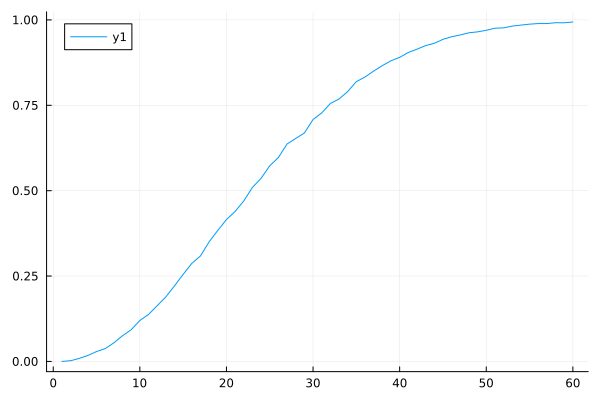

In [34]:
map(compute_prob, 1:60) |> plot

The function we just defined uses a Monte Carlo simulation,
but we can use what we've learned about probability theory
to compute the exact value.
Not only do we get the exact answer using math,
but the computations are much faster since we
don't have to generate experiments.
We simply get a number.
To make the math simpler for this particular problem,
instead of computing the probability of it happening,
we'll compute the probability of it not happening,
and then we can use the multiplication rule.
Let's start with the first person.
The probability that person 1 has a unique birthday is 1, of course.
All right.
Now let's move on to the second one.
The probability that the second person has
a unique birthday given that person 1 already took one of the days
is 364 divided by 365.
Then for a person 3, given that the first two people already
have unique birthdays, that leaves 363.
So now that probability is 363 divided by 365.
If we continue this way and find the chances of all,
say, 50 people having unique birthdays, we would multiply 1 times 364 divided
by 365, times 363 divided by 365, dot dot
dot, all the way to the 50th element.

$$Pr(\text{person 1 has a unique birthday}) = 1$$

$$Pr(\text{person 2 has a unique birthday} \text{ | } \text{person 1 has a unique birthday}) = \frac{364}{365}$$

$$Pr(\text{person 3 has a unique birthday} \text{ | } \text{person 1 has a unique birthday} \text{ and } \text{person 2 has a unique birthday}) = \frac{363}{365}$$


Now, we can easily write a function that does this.
This time we'll call it exact prob.
It takes n as a argument, and it computes
this probability using this simple code.

In [35]:


function exact_prob(n::Int)
    prob_unique = [(365 - i) / 365 for i in 0:(n-1)]
    return 1 - prod(prob_unique)
end
  

 


exact_prob (generic function with 1 method)

In [36]:
exact_prob(50)

0.9703735795779884

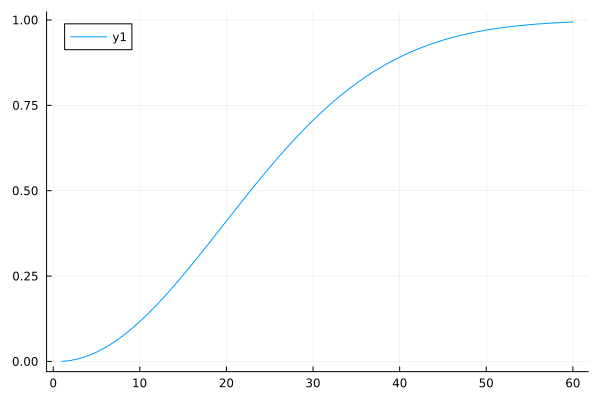

In [37]:
map(exact_prob, 1:60) |> plot

RAFAEL IRIZARRY: In the examples we have seen,
we have used 10,000 Monte Carlo experiments.
It turns out that this provided very accurate estimates for the examples
we looked at.
In more complex calculations, 10,000 may not nearly be enough.
Also for some calculations, 10,000 experiments
might not be computationally feasible, and it might be more than we need.
In practice, we won't know what the answer
is, so we don't know if our Monte Carlo estimate is accurate.
We know that the larger the number of experiments, we've
been using the letter B to represent that, the better the approximation.
But how big do we need it to be?
This is actually a challenging question, and answering it often requires
advanced theoretical statistics training.
One practical approach we will describe here
is to check for the stability of the estimate.
Here's an example with the birthday problem.
We're going to use n equals 22.
There's 22 people.
So we're going to run a simulation where we compute or estimate
the probability of two people having a certain birthday using different sizes
of the Monte Carlo simulations.
So the value of b going to go from 10, to 20, to 40, to 100, et cetera.
We compute the simulation, and now we look at the values
that we get for each simulation.
Remember, each simulation has a different b,
a different number of experiments.
When we see this graph, we can see that it's wiggling up and down.
That's because the estimate is not stable yet.
It's not such a great estimate.
But as b gets bigger and bigger, eventually it starts to stabilize.
And that's when we start getting a feeling for the fact
that now perhaps we have a large enough number of experiments.

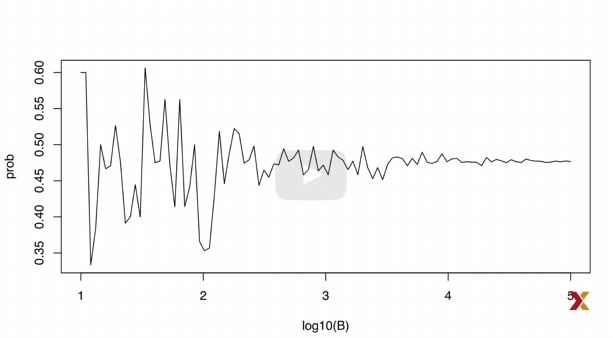

# Continuous Probability

For a random variable that can take any value in a continuous set, it impossible to assign a positive probabilities to the infinite number of possible values. Here we describe how we mathematically define distributions for continuos random variables and useful approximations often used in data analysis.


After completing Section 2, you will:

understand the differences between calculating probabilities for discrete and continuous data.
be able to use cumulative distribution functions to assign probabilities to intervals when dealing with continuous data.
be able to use R to generate normally distributed outcomes for use in Monte Carlo simulations.
know some of the useful theoretical continuous distributions in addition to the normal distribution, such as the student-t, chi-squared, exponential, gamma, beta, and beta-binomial distributions.

it is much more practical to define a function that operates
on intervals rather than single values.
The standard way of doing this is using the cumulative distribution function.

## Empirical Cumulative Distribution Function (ECDF)

In [38]:
# Generate a sample vector of 1000 values for height
# download height data from a open source data set

using CSV
using DataFrames

# sample heights vector in cm
height = [147, 201, 172, 155, 196, 174, 192, 178, 180, 185,
161, 164, 195, 206, 200, 176, 177, 198, 143, 149,
164, 173, 163, 168, 192, 191, 153, 167, 144, 172,
180, 189, 141, 169, 154, 160, 171, 179, 193, 198,
187, 168, 182, 178, 171, 157, 175, 199, 162, 145,
166, 161, 156, 150, 205, 146, 176, 209, 148, 155,
207, 194, 203, 191, 202, 162, 144, 153, 165, 172,
158, 202, 186, 164, 169, 182, 208, 193, 151, 181,
142, 177, 170, 159, 184, 207, 162, 181, 170, 163,
160, 193, 183, 200, 175, 159, 183, 154, 195, 189,
167, 192, 152, 141, 190, 157, 162, 180, 179, 166,
185, 198, 146, 175, 206, 147, 201, 172, 155, 196,
174, 192, 178, 180, 185, 161, 164, 195, 206, 200,
176, 177, 198, 143, 149, 164, 173, 163, 168, 192,
191, 153, 167, 144, 172, 180, 189, 141, 169, 154,
160, 171, 179, 193, 198, 187, 168, 182, 178, 171,
157, 175, 199, 162, 145, 166, 161, 156, 150, 205,
146, 176, 209, 148, 155, 207, 194, 203, 191, 202,
162, 144, 153, 165, 172, 158, 202, 186, 164, 169,
182, 208, 193, 151, 181, 142, 177, 170, 159, 184,
207, 162, 181, 170, 163, 160, 193, 183, 200, 175,
159, 183, 154, 195, 189, 167, 192, 152, 141, 190,
157, 162, 180, 179, 166, 185, 198, 146, 175, 206,
147, 201, 172, 155, 196, 174, 192, 178, 180, 185,
161, 164, 195, 206, 200, 176, 177]




247-element Vector{Int64}:
 147
 201
 172
 155
 196
 174
 192
 178
 180
 185
   ⋮
 180
 185
 161
 164
 195
 206
 200
 176
 177

## Definition of empirical cumulative distribution function

$$ F (a) = mean (x \leq a) $$


which, for any value a, gives the proportion of values in the list x that are smaller or equal than a.

In [39]:
F(a::Float64, v::Vector) = mean(v .≤ a)

F (generic function with 1 method)

In [40]:
F(170.0, height)

0.4291497975708502

Let’s connect the eCDF to probability by asking: if I pick one of the male students at random, what is the chance that he is taller than 170 cm? Because every student has the same chance of being picked, the answer to this is equivalent to the proportion of students that are taller than 170 cm. Using the eCDF we obtain an answer by typing:

$$ 1 - F(170.0, height) $$

The CDF is a version of the eCDF that assigns theoretical probabilities for each  
a
  rather than proportions computed from data. Although, as we just demonstrated, proportions computed from data can be used to define probabilities for a random variable. Specifically, the CDF for a random outcome  
X
  defines, for any number  
a
 , the probability of observing a value larger than  
a
 .

$$ F(a) = Pr(X ≤  a)

Once a CDF is defined, we can use it to compute the probability of any subset of values. For instance, the probability of a student being between height a and height b is:

$$ Pr(a < X ≤ b) = F(b) - F(a) $$

## Theorical Cumulative Distribution Function (CDF)

A mathematical result that is actually very useful in practice is that for most CDFs we can define a function, call it  f(x)
 , that permits us to construct the CDF using Calculus, like this:

$$ F(b) - F(a) = \int_a^b f(x) dx $$

f(x)
  is referred to as the probability density function. The intuition is that even for continuous outcomes we can define tiny intervals, that are almost as small as points, that have positive probabilities. If we think of the size of these intervals as the base of a rectangle,the probability density function 
f determines the height of the rectangle so that the summing up the area of these rectangles approximate the probability 
F(b)−F(a). This sum can be written as Reimann sum that is approximated by an integral:

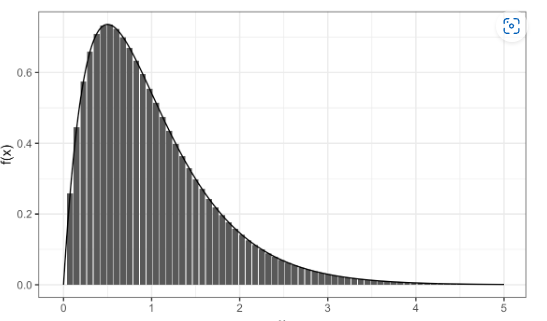

An example of such a continuous distribution is the normal distribution. As we saw in 12.4, the probability density function is given by:

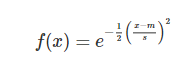

The cumulative distribution for the normal distribution is defined by a mathematical formula which in julia can be obtained with the function norm. We say that a random quantity is normally distributed with average m and standard deviation s if its probability distribution is defined by:

In [41]:
using Distributions

In [42]:
# create a normal distribution with mean m and standard deviation s

m = mean(height)
s = std(height)

F(a) = cdf(Normal(m, s), a)

F (generic function with 2 methods)

In [43]:
F(170.0)

0.39767796609047

## 13.10.3 Theoretical distributions as approximations


The normal distribution is derived mathematically: we do not need data to define it. For practicing data scientists, almost everything we do involves data. Data is always, technically speaking, discrete. For example, we could consider our height data categorical with each specific height a unique category. The probability distribution is defined by the proportion of students reporting each height. Here is a plot of that probability distribution

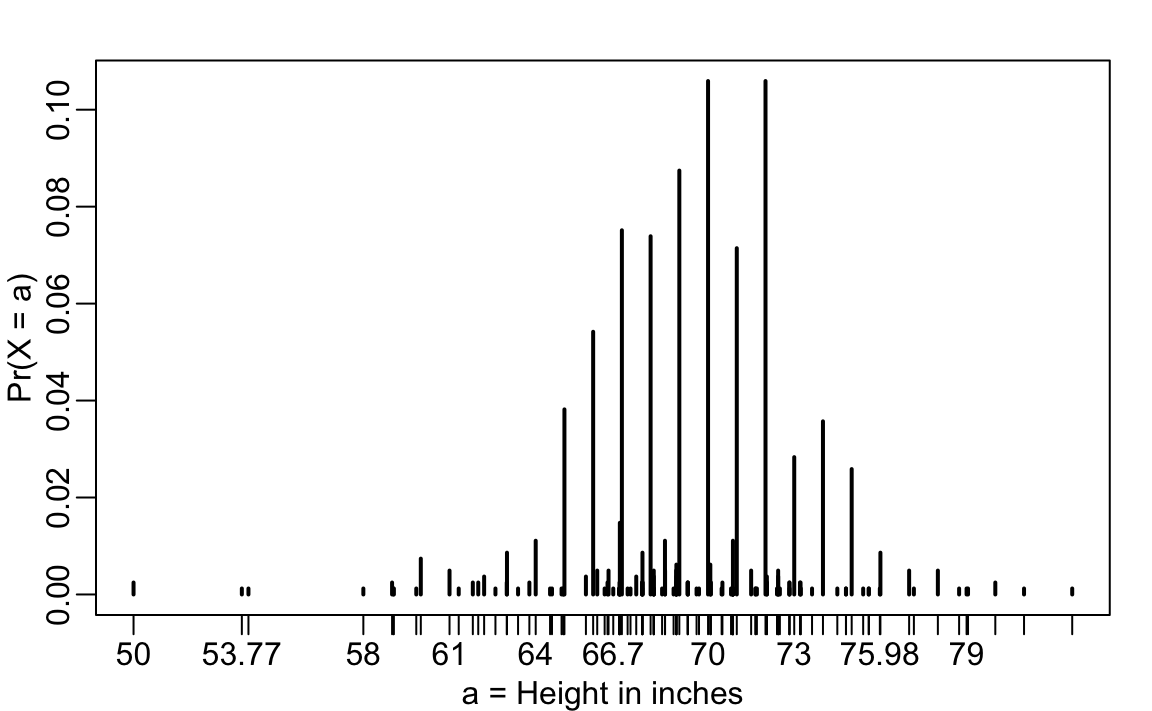

## Monte Carlos Simulations with Theoretical Distributions

## Generating normal distributed random numbers

In [46]:
# create normal distribution with size n, mean m and standard deviation s
m = 170
s = 10
N = 1000
v = rand(Normal(m, s), N);

Not surprisingly, the distribution of these outcomes
looks normal because they were generated to look normal.

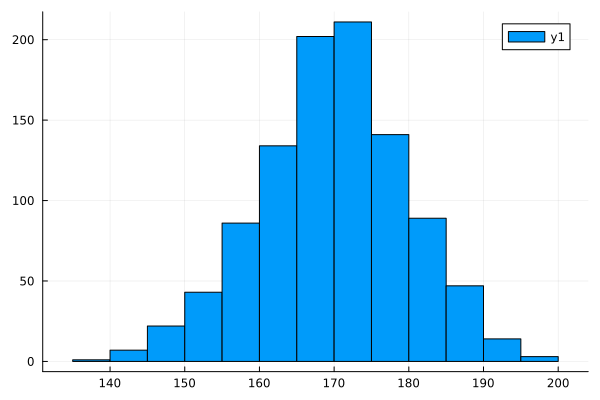

In [47]:
histogram(v, bins = 20)

as it will permit us to generate data that mimics naturally occurring events,
and it'll let us answer questions related
to what could happen by chance by running Monte Carlo simulations.
For example, if we pick 800 males at random,
what is the distribution of the tallest person?
Specifically, we could ask, how rare is that the tallest person is a seven
footer?

We can use the following Monte Carlo simulation to answer this question.
We're going to run 10,000 simulations, and for each one,
we're going to generate 800 normally distributed values,
pick the tallest one, and return that.
The tallest variable will have these values.
So now we can ask, what proportion of these simulations
return a seven footer as the tallest person?
And we can see that it's a very small number.

In [58]:
m = 175.26
s = 7.11

sim(n) = rand(Normal(m, s), n) 



sim (generic function with 1 method)

In [64]:
# monte carlos simulation
# We're going to run 10,000 simulations, and for each one,
# we're going to generate 800 normally distributed values,
# pick the tallest one, and return that.
# The tallest variable will have these values.
# So now we can ask, what proportion of these simulations
# return a seven footer as the tallest person?

# create empty vector to store results


tallest = []
[push!(tallest, sim(800) |> maximum) for i in 1:20000]; # run simulation 20000 times


In [65]:
# calculate the proportion of 7 footers

mean(tallest .≥ 213.36) # 7 feet in cm

0.0

In [66]:
tallest |> maximum

211.3825697798321